## Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

In [ ]:
from IPython.core.interactiveshell import InteractiveShell


InteractiveShell.ast_node_interactivity = "all"

## Data

In [3]:
from sklearn.datasets import load_iris


iris = load_iris()
iris['data'].shape
iris['target']
iris['feature_names']
iris['target_names']

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris


feature = pd.DataFrame(iris['data'], columns = iris['feature_names'])
target = pd.DataFrame(iris['target'], columns = ['class'])
df = pd.concat([feature, target], axis=1)

## EDA

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


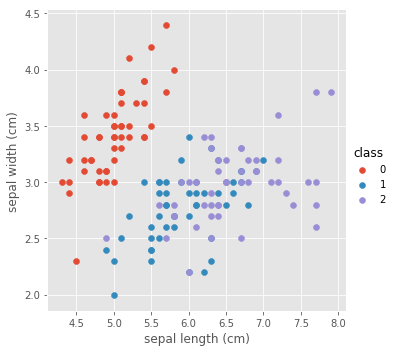

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
g = sns.FacetGrid(df,hue='class', size=5)
g.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')
g.add_legend()

## Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x = df.iloc[:,:2].values
y = df.iloc[:,4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify = y)
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

## Model

In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_std,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
gnb.score(x_train_std, y_train)
gnb.score(x_test_std, y_test)
'''
accuracy_train=100*(y_train_pred==y_train).sum()/x_train_std.shape[0]
accuracy_test=100*(y_test_pred==y_test).sum()/x_test_std.shape[0]
'''

0.819047619047619

0.7111111111111111

In [16]:
gnb.predict(x_train_std)[0:10]
gnb.predict_proba(x_train_std)[0:10]

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 2])

array([[9.96413360e-01, 1.40056426e-04, 3.44658375e-03],
       [8.56419023e-01, 9.26429798e-02, 5.09379974e-02],
       [7.32385795e-04, 2.72041090e-01, 7.27226524e-01],
       [3.30823656e-05, 8.23226530e-02, 9.17644265e-01],
       [9.24946048e-01, 6.15152418e-02, 1.35387107e-02],
       [1.50666256e-05, 1.40832839e-01, 8.59152094e-01],
       [1.17810743e-11, 2.21377536e-03, 9.97786225e-01],
       [9.11661064e-01, 5.96302194e-03, 8.23759136e-02],
       [9.20247516e-09, 2.07233778e-02, 9.79276613e-01],
       [2.31860910e-05, 2.85457541e-01, 7.14519273e-01]])

## Decision Region

In [17]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(x,y,classifier,test_idx=None,resolution=0.02):
    markers=['s','x','o','^','v']
    colors=['red','blue','lightgreen','gray','cyan']
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    '''
    np.arange(x1_min,x1_max,resolution).shape
    np.arange(x2_min,x2_max,resolution).shape
    test1=xx1.ravel()
    test2=xx2.ravel()
    test3=np.array([xx1.ravel(),xx2.ravel()]).T
    '''
    
    x1_min, x1_max=x[:,0].min()-1, x[:,0].max()+1
    x2_min, x2_max=x[:1].min(), x[:,1].max()+1
    xx1, xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #test_a=list(enumerate(np.unique(y)))
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],
                    y=x[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    
    if test_idx:
        x_test,y_test=x[test_idx,:], y[test_idx]
        
        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

<Figure size 432x360 with 0 Axes>

Text(0.5, 0, 'sepal length [standardized]')

Text(0, 0.5, 'sepal width [standardized]')

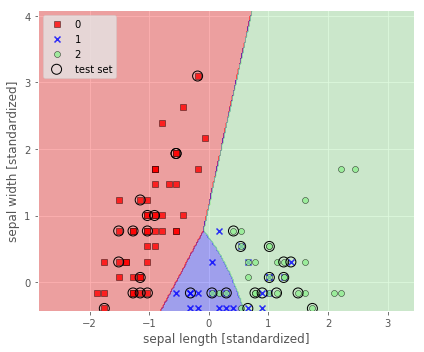

In [25]:
x_combined_std=np.vstack((x_train_std,x_test_std))
y_combined=np.hstack((y_train,y_test))

plt.figure(figsize=(6, 5))
plot_decision_regions(x_combined_std,y_combined,
                      classifier=gnb,test_idx=range(105,150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()